# Banana Collection

---


### 1. Start the Environment

Run the code cell below to import all necessary dependencies. Make sure to modify the UnityEnvironment file_name to point to the directory where you unzipped your BananaApp file

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import random
from collections import namedtuple, deque
import matplotlib.pyplot as plt
from agent import Agent
import torch

# Modify the line below to point to your app location
env = UnityEnvironment(file_name="/Users/adlam/Downloads/Banana.app")
brain_name = env.brain_names[0]
brain = env.brains[brain_name]


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [2]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Train your agent!

In the next code cell, you will use the Python API to control the agent and receive feedback from the environment. If you would like your training to finish more quickly and watch an agent in the middle of training, you can decrease `n_episodes` or decrease the `target_score`

Episode 100	Average Score: 0.54
Episode 200	Average Score: 4.79
Episode 300	Average Score: 7.95
Episode 400	Average Score: 8.06
Episode 500	Average Score: 10.79
Episode 600	Average Score: 12.15
Episode 700	Average Score: 13.43
Episode 800	Average Score: 14.47
Episode 900	Average Score: 15.38
Episode 996	Average Score: 16.01
Environment solved in 896 episodes!	Average Score: 16.01


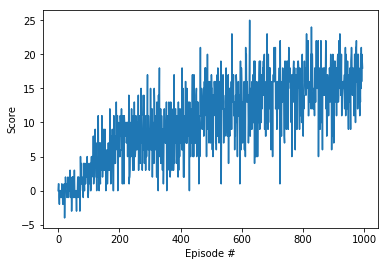

In [3]:
agent = Agent(state_size, action_size, 0)
target_score = 16.0

def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    brain_name = "BananaBrain"
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon

    for i_episode in range(1, n_episodes+1):

        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0]            # get the current state
        score = 0                                          # initialize the score                
        
        for t in range(max_t):
            action = agent.act(state, eps)                 # select an action
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            
            # step to save and learn
            agent.step(state, action, reward, next_state, done)
            score += reward                                # update the score
            state = next_state                             # roll over the state to next time step
            if done:                                       # exit loop if episode finished
                break    
    
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=target_score:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    return scores

scores = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### Average Score over Time

Let's take a look at how the agent trained over time.

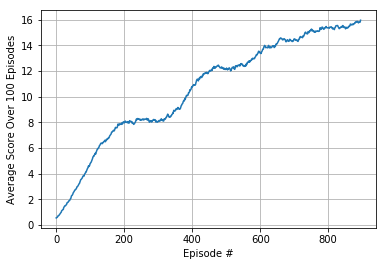

The environment was solved in 584 episodes


In [4]:
fig = plt.figure()
sliding_window = []
for i in range(len(scores)-100):
    sliding_window.append(np.mean(scores[i:i+100]))
ax = fig.add_subplot(111)
plt.grid()
plt.plot(np.arange(len(sliding_window)), sliding_window)
plt.ylabel('Average Score Over 100 Episodes')
plt.xlabel('Episode #')
plt.show()

for idx, avg_score in enumerate(sliding_window):
    if avg_score > 13.0:
        print("The environment was solved in {} episodes".format(idx))
        break

### 4. Watch your trained agent

You can use the pre-saved weights, checkpoint.pth to start up your agent if you haven't already trained one. Otherwise, if you've trained an agent from the cell before, skip to the `Watch your agent!` cell.

In [ ]:
agent = Agent(state_size, action_size, 0)
agent.qnetwork_local.load_state_dict(torch.load("checkpoint.pth"))

In [6]:
# Watch your agent!

env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = agent.act(state, 0)                   # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished

    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break    

    
print("Score: {}".format(score))

Score: 14.0


### 5. Close your environment when finished.

In [7]:
env.close()